Project 3: Unveiling the Android App Market: Analyzing Google Play Store Data - Oasis Infobyte

In [ ]:
#Import Libraries & Load Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

apps = pd.read_csv('/content/sample_data/apps.csv')
reviews = pd.read_csv('/content/sample_data/user_reviews.csv')


In [ ]:
print("Apps dataset:")
print(apps.info())
print(apps.describe())

print("\nReviews dataset:")
print(reviews.info())


In [ ]:
# Data Cleaning
apps.dropna(subset=['Category', 'Rating', 'Reviews', 'Installs'], inplace=True)
apps = apps[apps['Size'] != 'Varies with device']

# Clean and convert data types
apps['Installs'] = apps['Installs'].astype(str).str.replace('[+,]', '', regex=True)
apps['Installs'] = pd.to_numeric(apps['Installs'], errors='coerce')

apps['Price'] = apps['Price'].astype(str).str.replace('$', '', regex=False)
apps['Price'] = pd.to_numeric(apps['Price'], errors='coerce')

apps['Reviews'] = pd.to_numeric(apps['Reviews'], errors='coerce')

apps['Size'] = apps['Size'].astype(str).str.replace('M','').str.replace('k','')
apps = apps[apps['Size'].str.replace('.', '', regex=False).str.isnumeric()]
apps['Size'] = apps['Size'].astype(float)

apps['Rating'] = pd.to_numeric(apps['Rating'], errors='coerce')



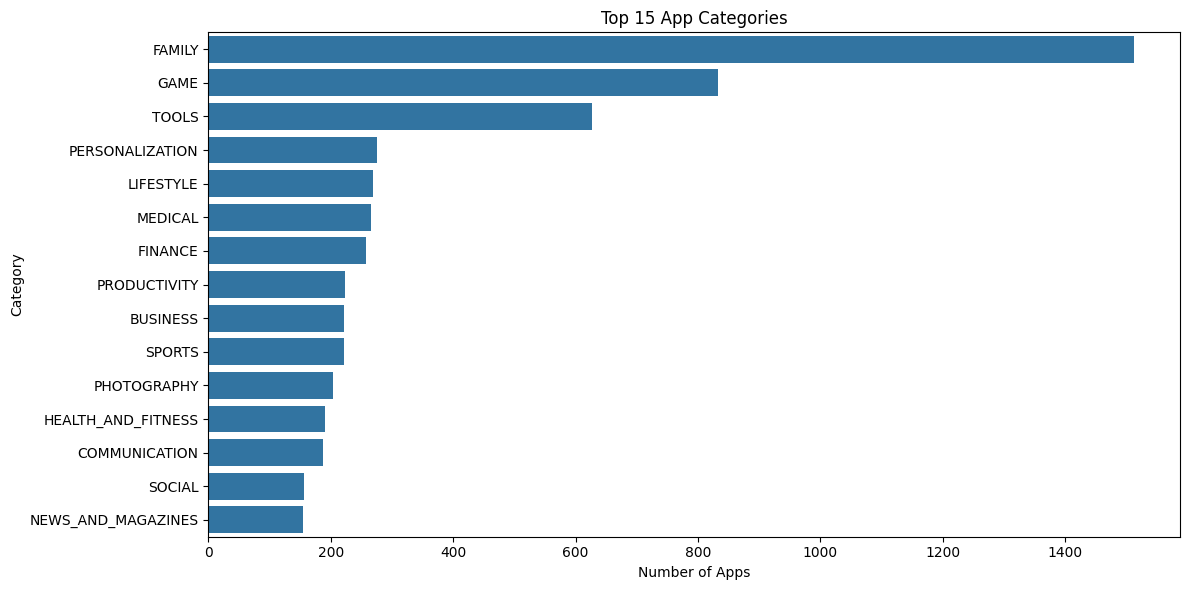

In [ ]:
# Explore Categories
plt.figure(figsize=(12, 6))
sns.countplot(y='Category', data=apps, order=apps['Category'].value_counts().index[:15])
plt.title("Top 15 App Categories")
plt.xlabel("Number of Apps")
plt.tight_layout()
plt.show()


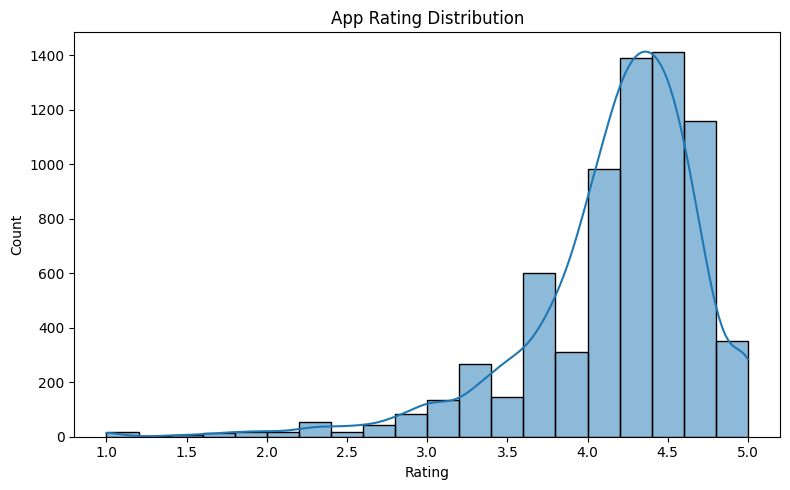

In [ ]:
# Ratings Distribution

plt.figure(figsize=(8, 5))
sns.histplot(apps['Rating'], bins=20, kde=True)
plt.title("App Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


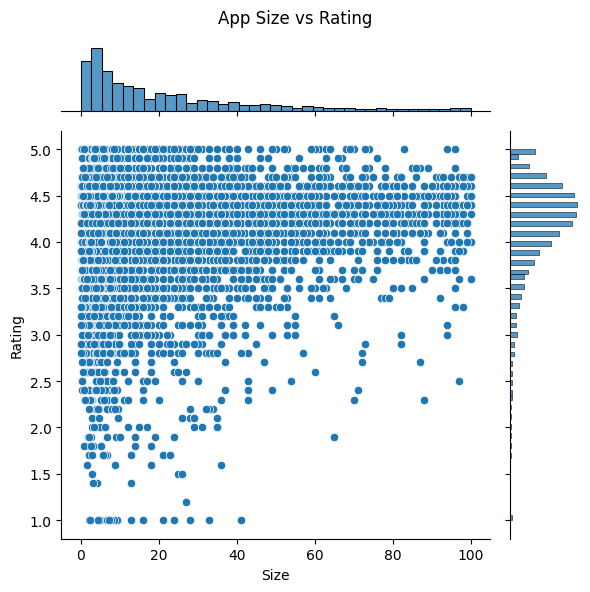

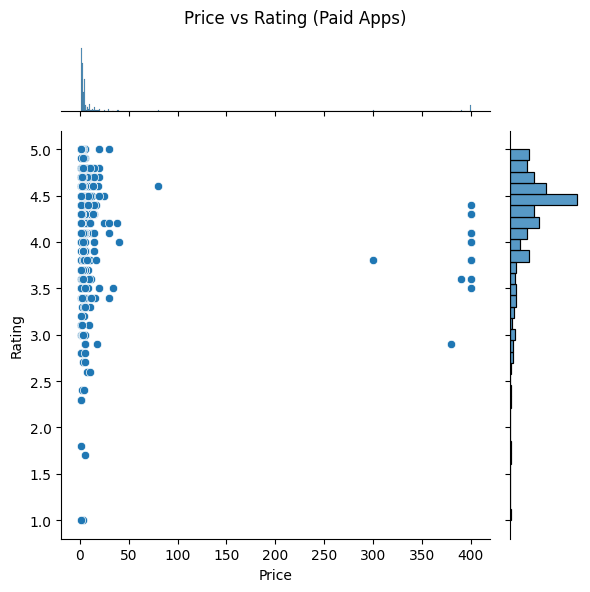

In [ ]:
# Size vs Rating & Price vs Rating

apps_valid = apps.dropna(subset=['Size', 'Rating'])
sns.jointplot(x='Size', y='Rating', data=apps_valid)
plt.suptitle("App Size vs Rating")
plt.tight_layout()
plt.show()

paid_apps = apps[apps['Type'] == 'Paid']
sns.jointplot(x='Price', y='Rating', data=paid_apps)
plt.suptitle("Price vs Rating (Paid Apps)")
plt.tight_layout()
plt.show()


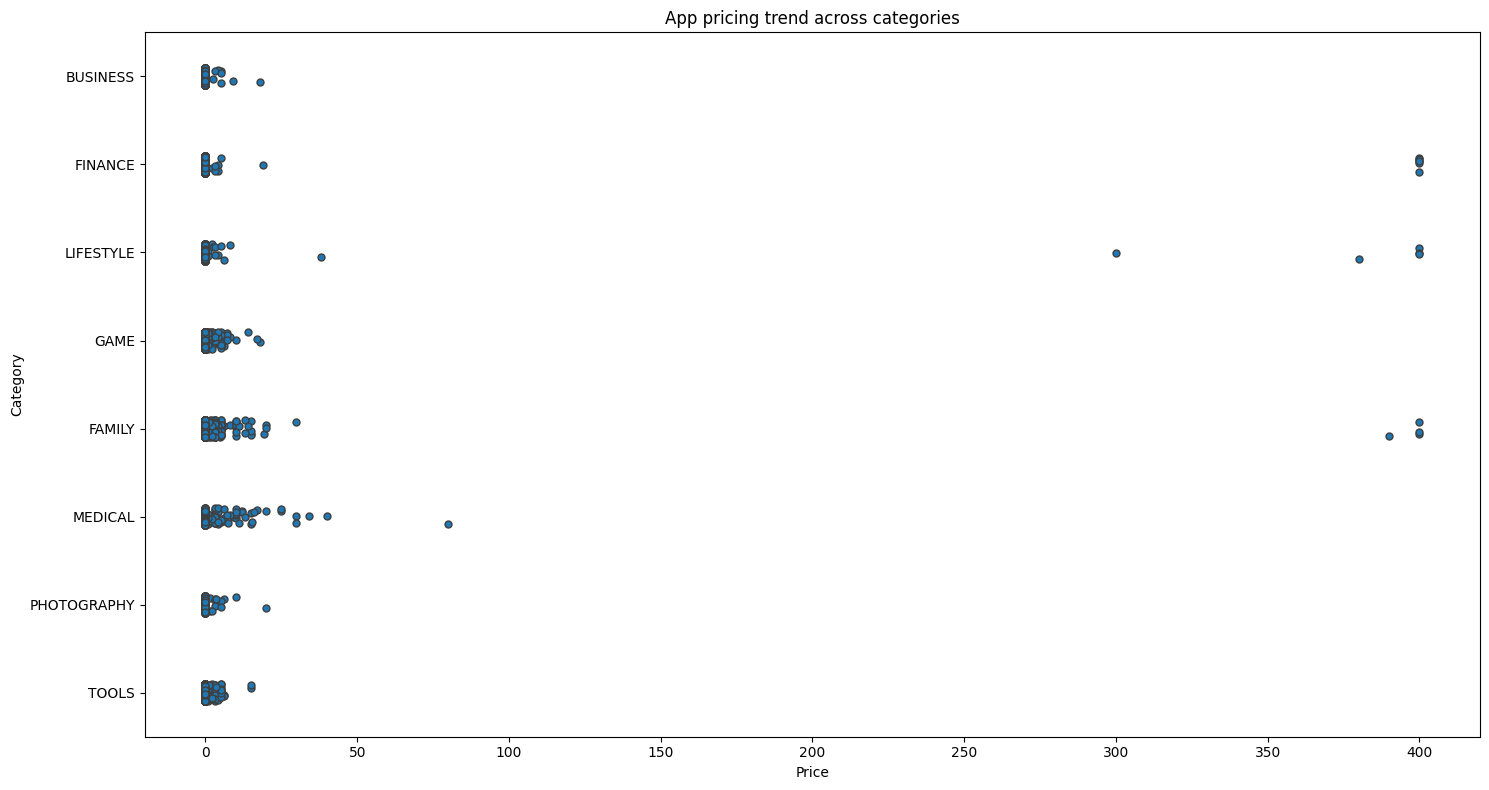

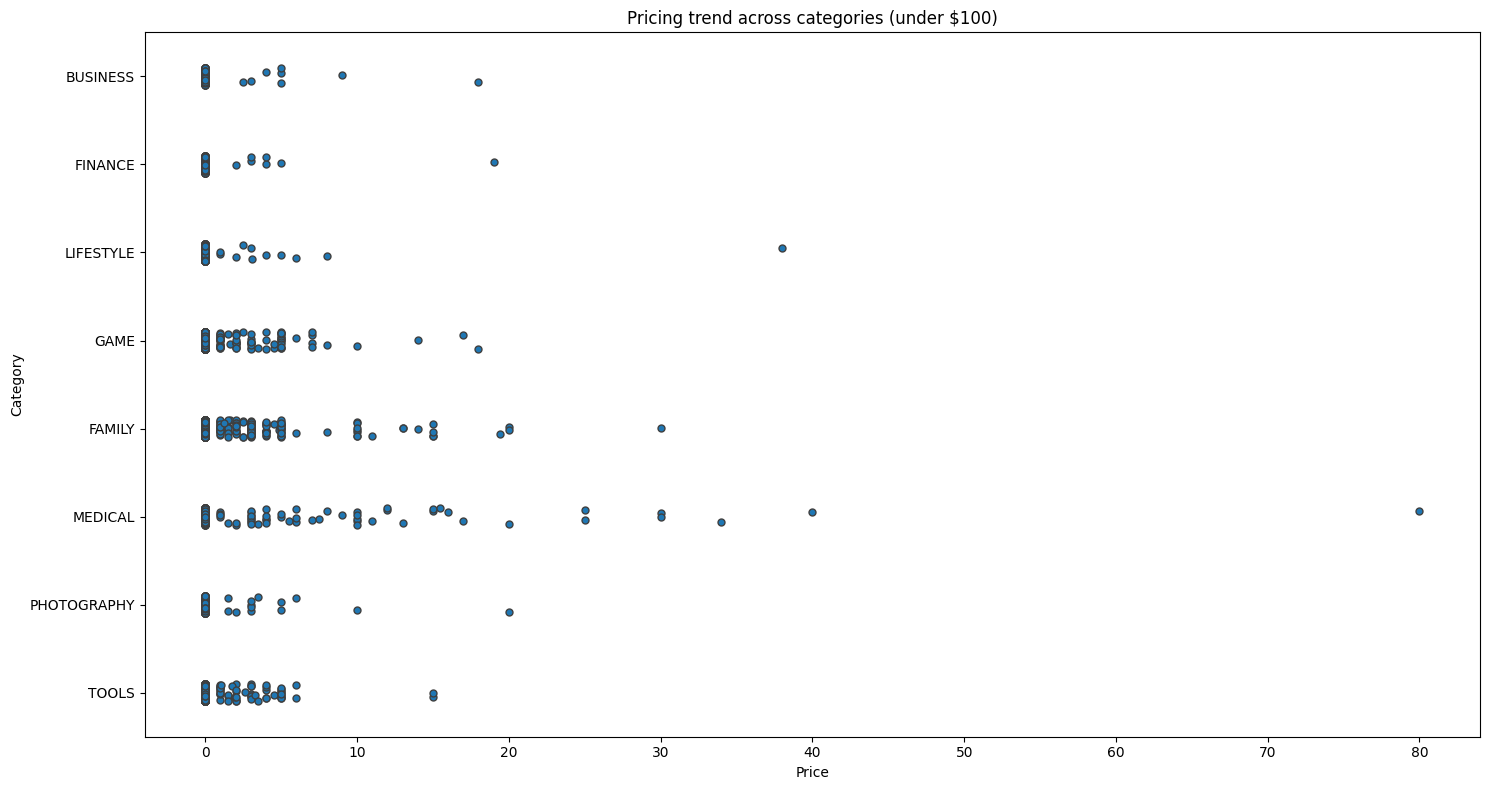

In [ ]:
# Category vs Price + Junk Filter

popular_cats = apps[apps['Category'].isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                           'MEDICAL', 'TOOLS', 'FINANCE',
                                           'LIFESTYLE','BUSINESS'])]
fig, ax = plt.subplots(figsize=(15, 8))
sns.stripplot(x='Price', y='Category', data=popular_cats, jitter=True, linewidth=1, ax=ax)
ax.set_title('App pricing trend across categories')
plt.tight_layout()
plt.show()

# Filter and replot
apps_under_100 = popular_cats[popular_cats['Price'] < 100]
fig, ax = plt.subplots(figsize=(15, 8))
sns.stripplot(x='Price', y='Category', data=apps_under_100, jitter=True, linewidth=1, ax=ax)
ax.set_title('Pricing trend across categories (under $100)')
plt.tight_layout()
plt.show()

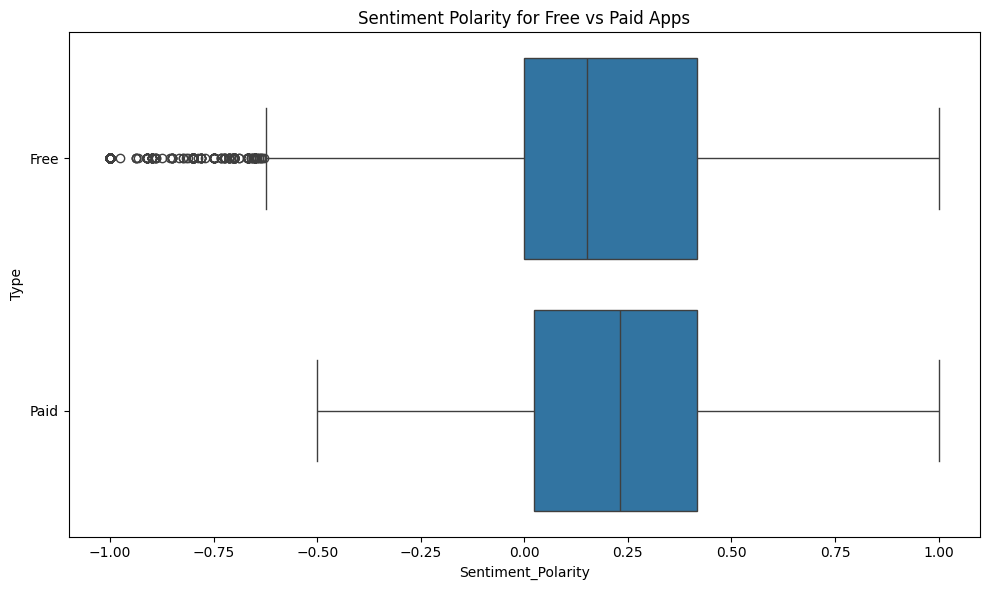

In [ ]:
# Sentiment Analysis
merged = pd.merge(apps, reviews, on='App', how='inner')
merged = merged.dropna(subset=['Sentiment', 'Translated_Review'])

plt.figure(figsize=(10, 6))
sns.boxplot(x='Sentiment_Polarity', y='Type', data=merged)
plt.title("Sentiment Polarity for Free vs Paid Apps")
plt.tight_layout()
plt.show()


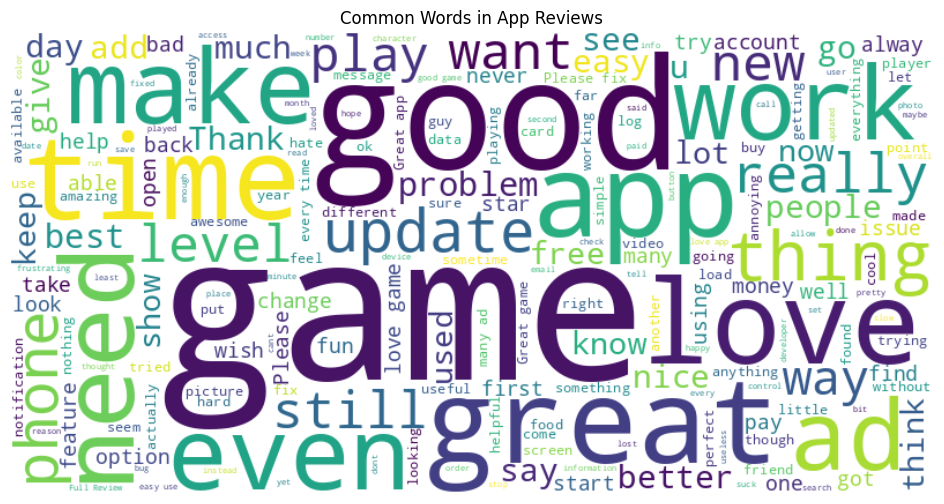

In [ ]:
# WordCloud of Reviews

text = " ".join(merged['Translated_Review'].dropna().astype(str))
wc = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Common Words in App Reviews")
plt.show()

In [ ]:
# Export Cleaned Data

apps.to_csv("cleaned_googleplaystore.csv", index=False)
print("Project completed successfully.")


Project completed successfully.
